In [20]:
import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt

# Load file
df = pd.read_csv("/kaggle/input/test-mimic-cxr/mimic_cxr_aug_train.csv")
for col in ['image', 'view', 'AP', 'PA', 'Lateral', 'text', 'text_augment']:
    df[col] = df[col].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])


In [21]:
df.head(3)

,Unnamed: 0.1,Unnamed: 0,subject_id,image,view,AP,PA,Lateral,text,text_augment
0,0,0,10000032,[files/p10/p10000032/s50414267/02aa804e-bde0af...,"[PA, LATERAL, AP]",[files/p10/p10000032/s53911762/68b5c4b1-227d04...,[files/p10/p10000032/s50414267/02aa804e-bde0af...,[files/p10/p10000032/s50414267/174413ec-4ec4c1...,"[Findings: There is no focal consolidation, pl...","[Findings: There is no focus, pleural effusion..."
1,1,1,10000764,[files/p10/p10000764/s57375967/096052b7-d256dc...,"[AP, LATERAL]",[files/p10/p10000764/s57375967/096052b7-d256dc...,[],[files/p10/p10000764/s57375967/b79e55c3-735ce5...,[Findings: PA and lateral views of the chest p...,[Finds: PA and lateral view of the breast inte...
2,2,2,10000898,[files/p10/p10000898/s50771383/0c4eb1e1-b80190...,"[LATERAL, PA]",[],[files/p10/p10000898/s50771383/2a280266-c8bae1...,[files/p10/p10000898/s50771383/0c4eb1e1-b80190...,[Findings: PA and lateral views of the chest p...,[Finds: PA and side view of the chest provided...


In [22]:
print("\nSố lượng giá trị thiếu (NaN) ở mỗi cột:")
print(df.isnull().sum())

print("\nKiểu dữ liệu từng cột:")
print(df.dtypes)


Số lượng giá trị thiếu (NaN) ở mỗi cột:
Unnamed: 0.1    0
Unnamed: 0      0
subject_id      0
image           0
view            0
AP              0
PA              0
Lateral         0
text            0
text_augment    0
dtype: int64

Kiểu dữ liệu từng cột:
Unnamed: 0.1     int64
Unnamed: 0       int64
subject_id       int64
image           object
view            object
AP              object
PA              object
Lateral         object
text            object
text_augment    object
dtype: object


In [23]:
import ast

def safe_eval(x):
    try:
        if isinstance(x, str):
            return ast.literal_eval(x)
        elif isinstance(x, list):
            return x
        else:
            return []
    except Exception as e:
        print("Lỗi khi eval:", x, "\n", e)
        return []

# Áp dụng cho các cột list dạng chuỗi
for col in ['image', 'view', 'AP', 'PA', 'Lateral', 'text', 'text_augment']:
    df[col] = df[col].apply(safe_eval)

sample = df.iloc[0]

print("\nSample phân tích từ dòng đầu tiên:")
print("subject_id:", sample['subject_id'])
print("Số ảnh tổng:", len(sample['image']))
print("Các loại view:", sample['view'])
print("Số đoạn report gốc:", len(sample['text']))
print("Đoạn text gốc đầu tiên:\n", sample['text'][0][:300], "...")
print("Đoạn text augment đầu tiên:\n", sample['text_augment'][0][:300], "...")



Sample phân tích từ dòng đầu tiên:
subject_id: 10000032
Số ảnh tổng: 7
Các loại view: ['PA', 'LATERAL', 'AP']
Số đoạn report gốc: 4
Đoạn text gốc đầu tiên:
 Findings: There is no focal consolidation, pleural effusion or pneumothorax.  Bilateral nodular opacities that most likely represent nipple shadows. The cardiomediastinal silhouette is normal.  Clips project over the left lung, potentially within the breast. The imaged upper abdomen is unremarkable. ...
Đoạn text augment đầu tiên:
 Findings: There is no focus, pleural effusion or pneumothorax. Bilateral nickular turbidities, which probably represent nipple shadow. The cardiomediastinal silhouette is normal. Clips project across the left lung, possibly within the chest. The imaged upper belly is not conspicuous. Chronic deforma ...


In [24]:
df['has_AP'] = df['AP'].apply(lambda x: len(x) > 0)
print("Số bệnh nhân có ảnh AP:", df['has_AP'].sum())
print("Tỷ lệ % có ảnh AP:", df['has_AP'].mean() * 100)

Số bệnh nhân có ảnh AP: 32974
Tỷ lệ % có ảnh AP: 51.05440807605363


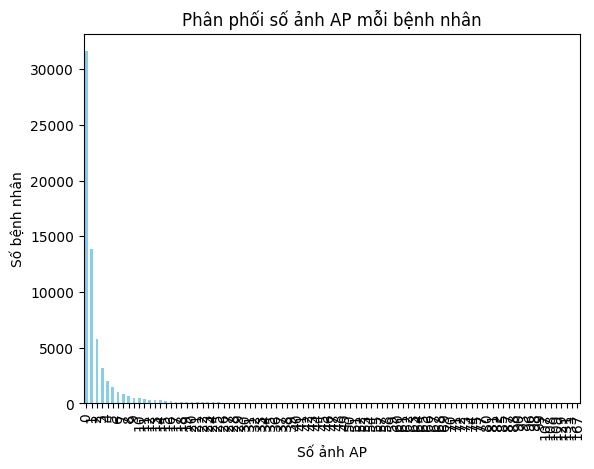

In [25]:
df['num_AP'] = df['AP'].apply(len)
df['num_AP'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Phân phối số ảnh AP mỗi bệnh nhân")
plt.xlabel("Số ảnh AP")
plt.ylabel("Số bệnh nhân")
plt.show()

Số bệnh nhân có ảnh PA: 45082
Tỷ lệ % có ảnh PA: 69.80150497011736


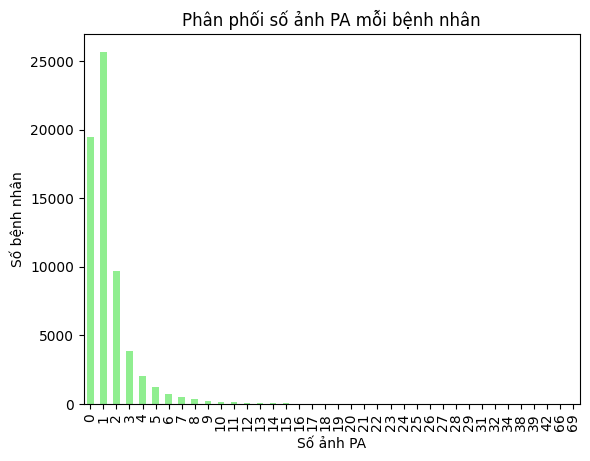

In [26]:
df['has_PA'] = df['PA'].apply(lambda x: len(x) > 0)
print("Số bệnh nhân có ảnh PA:", df['has_PA'].sum())
print("Tỷ lệ % có ảnh PA:", df['has_PA'].mean() * 100)

df['num_PA'] = df['PA'].apply(len)
df['num_PA'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title("Phân phối số ảnh PA mỗi bệnh nhân")
plt.xlabel("Số ảnh PA")
plt.ylabel("Số bệnh nhân")
plt.show()

Số bệnh nhân có ảnh Lateral: 44526
Tỷ lệ % có ảnh Lateral: 68.94063728981513


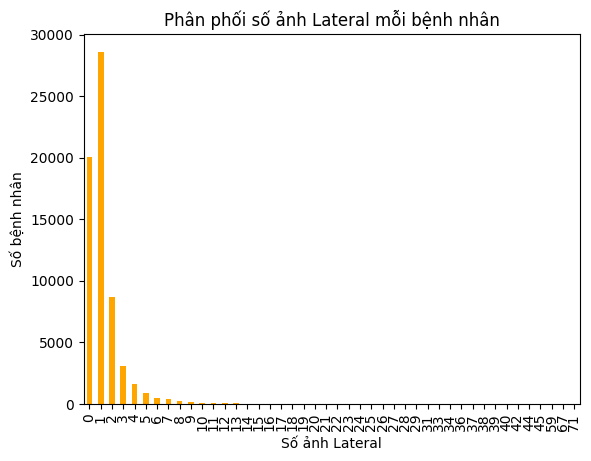

In [27]:
df['has_Lateral'] = df['Lateral'].apply(lambda x: len(x) > 0)
print("Số bệnh nhân có ảnh Lateral:", df['has_Lateral'].sum())
print("Tỷ lệ % có ảnh Lateral:", df['has_Lateral'].mean() * 100)

df['num_Lateral'] = df['Lateral'].apply(len)
df['num_Lateral'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title("Phân phối số ảnh Lateral mỗi bệnh nhân")
plt.xlabel("Số ảnh Lateral")
plt.ylabel("Số bệnh nhân")
plt.show()


Số lượng đoạn text trung bình: 3.449013718143251


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


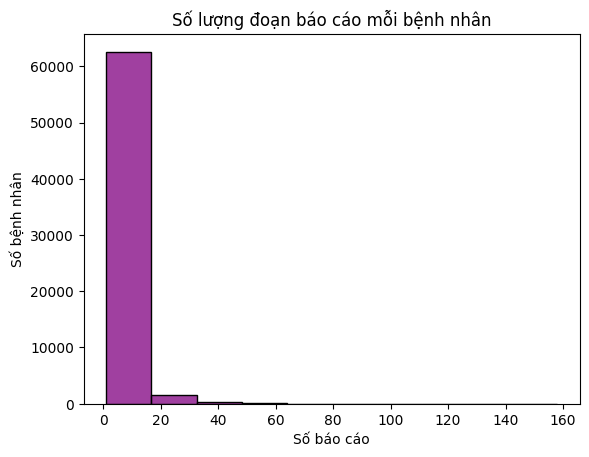

In [28]:
df['num_text'] = df['text'].apply(len)
print("Số lượng đoạn text trung bình:", df['num_text'].mean())

sns.histplot(df['num_text'], bins=10, kde=False, color='purple')
plt.title("Số lượng đoạn báo cáo mỗi bệnh nhân")
plt.xlabel("Số báo cáo")
plt.ylabel("Số bệnh nhân")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


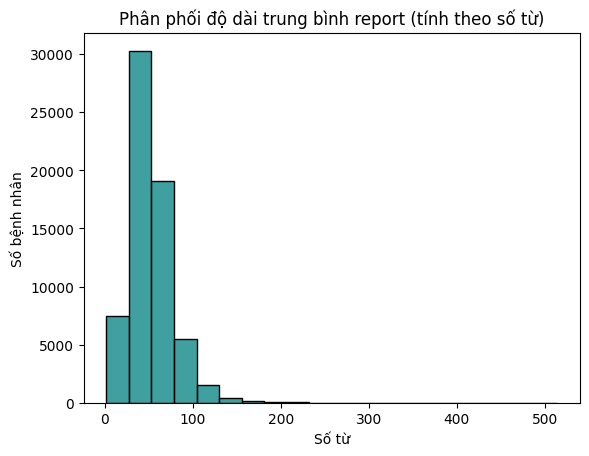

In [29]:
import numpy as np
df['avg_text_len'] = df['text'].apply(lambda texts: np.mean([len(t.split()) for t in texts]) if texts else 0)
sns.histplot(df['avg_text_len'], bins=20, kde=False, color='teal')
plt.title("Phân phối độ dài trung bình report (tính theo số từ)")
plt.xlabel("Số từ")
plt.ylabel("Số bệnh nhân")
plt.show()

In [30]:
df['num_images'] = df['image'].apply(len)
df['num_texts'] = df['text'].apply(len)

print("Tổng số hàng (patient):", len(df))
print("Tổng số ảnh:", df['num_images'].sum())
print("Tổng số report:", df['num_texts'].sum())

Tổng số hàng (patient): 64586
Tổng số ảnh: 368960
Tổng số report: 222758


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


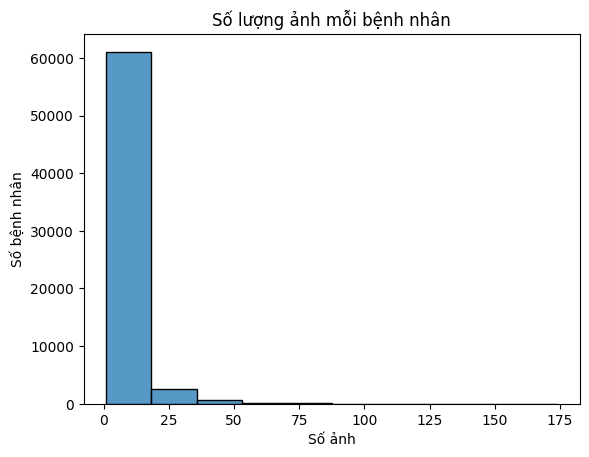

In [31]:
sns.histplot(df['num_images'], bins=10, kde=False)
plt.title("Số lượng ảnh mỗi bệnh nhân")
plt.xlabel("Số ảnh")
plt.ylabel("Số bệnh nhân")
plt.show()

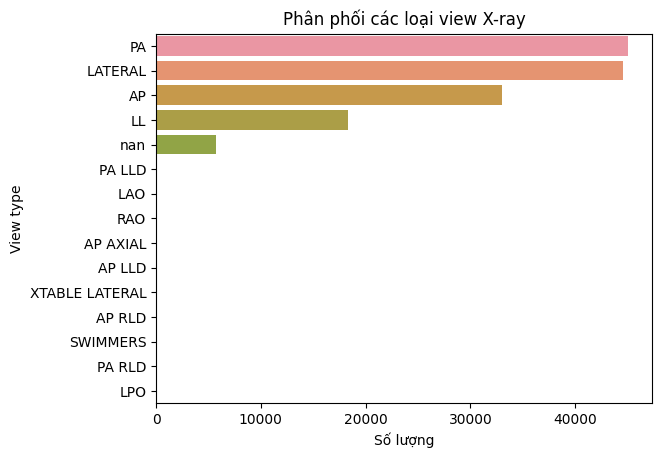

In [32]:
# Tạo flat list tất cả view
all_views = df['view'].explode().dropna()
sns.countplot(y=all_views, order=all_views.value_counts().index)
plt.title("Phân phối các loại view X-ray")
plt.xlabel("Số lượng")
plt.ylabel("View type")
plt.show()
